This notebook contains tests for the SurfaceCode class as well as the MultiLogicalSurfaceCode class. In the beginning we try out some visualization functions for the SurfaceCode class. Then we run a performance test for various code distances and physical error rates, collecting logical error rates and plotting them (solely for the SurfaceCode class). This only works on a by inserting a depolarizing noise at syndrome extraction rounds for now. The MultiLogicalSurfaceCode class is still work in progress and not fully functioning. Same goes for the other more advanced noise models in the SurfaceCode class.

We start off by looking into multiple logical encoded qubits. (Since this is a notebook and we test different instances of classes the order doesn't matter too much.)

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6)] [(0.5, 0.5), (2.5, 0.5), (4.5, 0.5), (1.5, 1.5), (3.5, 1.5), (5.5, 1.5), (0.5, 2.5), (2.5, 2.5), (4.5, 2.5), (1.5, 3.5), (3.5, 3.5), (5.5, 3.5), (0.5, 4.5), (2.5, 4.5), (4.5, 4.5), (1.5, 5.5), (3.5, 5.5), (5.5, 5.5), (1.5, -0.5), (3.5, -0.5), (5.5, -0.5), (0.5, 6.5), (2.5, 6.5), (4.5, 6.5)] [(1.5, 0.5), (3.5, 0.5), (5.5, 0.5), (0.5, 1.5), (2.5, 1.5), (4.5, 1.5), (1.5, 2.5), (3.5, 2.5), (5.5, 2.5), (0.5, 3.5), (2.5, 3.5), (4.5, 3.5), (1.5, 4.5), (3.5, 4.5), (5.5, 4.5), (0.5, 5.5), (2.5, 5.5), (4.5, 5.5), (-0.5, 0.5), (-0.5, 2.5), (-0.5, 4.5), (6.5, 1.5), (6.5, 3.5), (6.5, 5.5)]
[(0, 0), (1, 0), (2, 0)

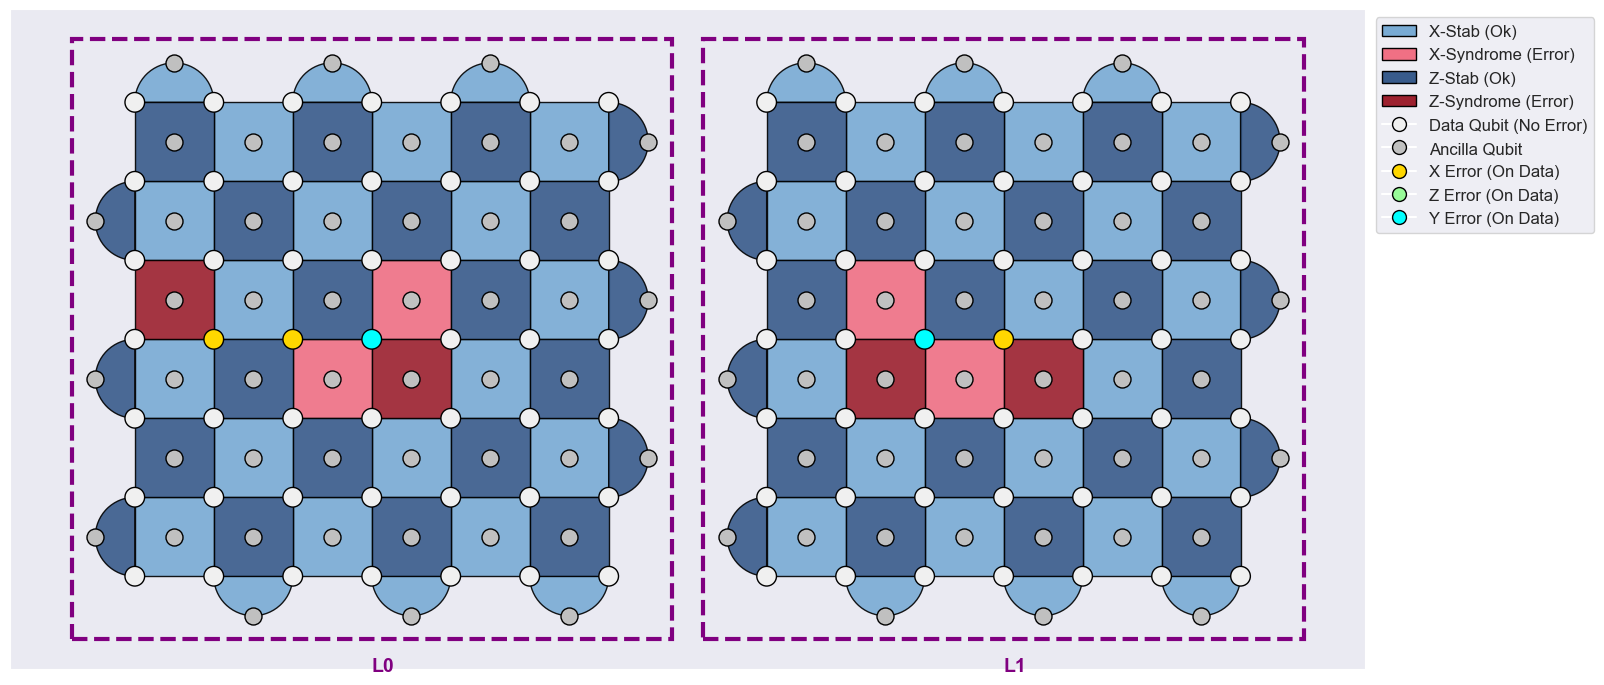

In [ ]:
from MultiSurfaceCode import MultiLogicalSurfaceCode
mlsc = MultiLogicalSurfaceCode(distance=7, num_logical_qubits=2)

x_errs = {
    "0": [46, 47, 48],   # Errors on first logical qubit patch
    "1": [144, 145]      # Errors on second logical qubit patch
}

z_errs = {
    "0": [48],
    "1": [144]
}

mlsc.visualize(show_ancillas=True, show_indices=False, X_errors=x_errs, Z_errors=z_errs)

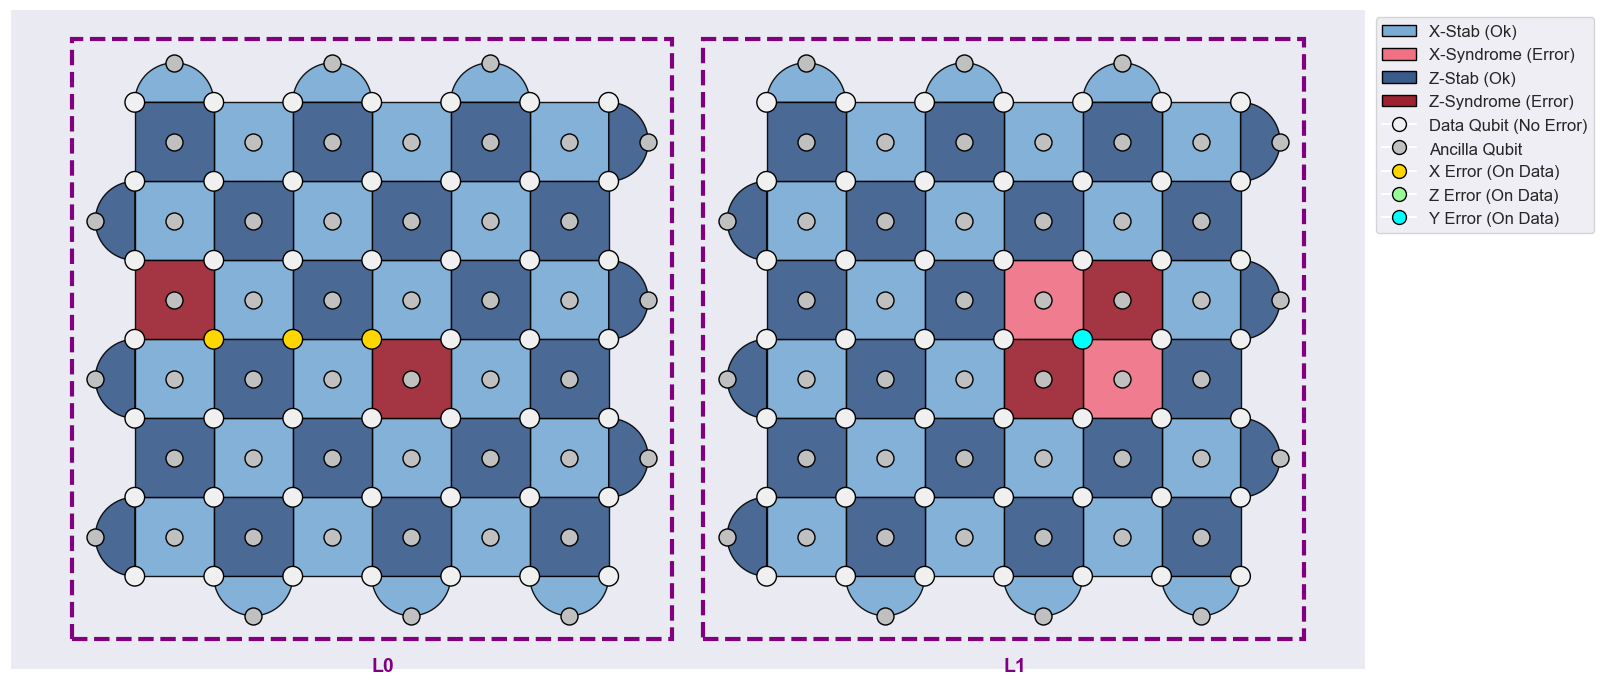

In [10]:
x_errs = {"0": [46, 47, 48], "1": [146] }
z_errs = {"0": [38], "1": [146]}

mlsc.visualize(show_ancillas=True, show_indices=False, X_errors=x_errs, Z_errors=z_errs)

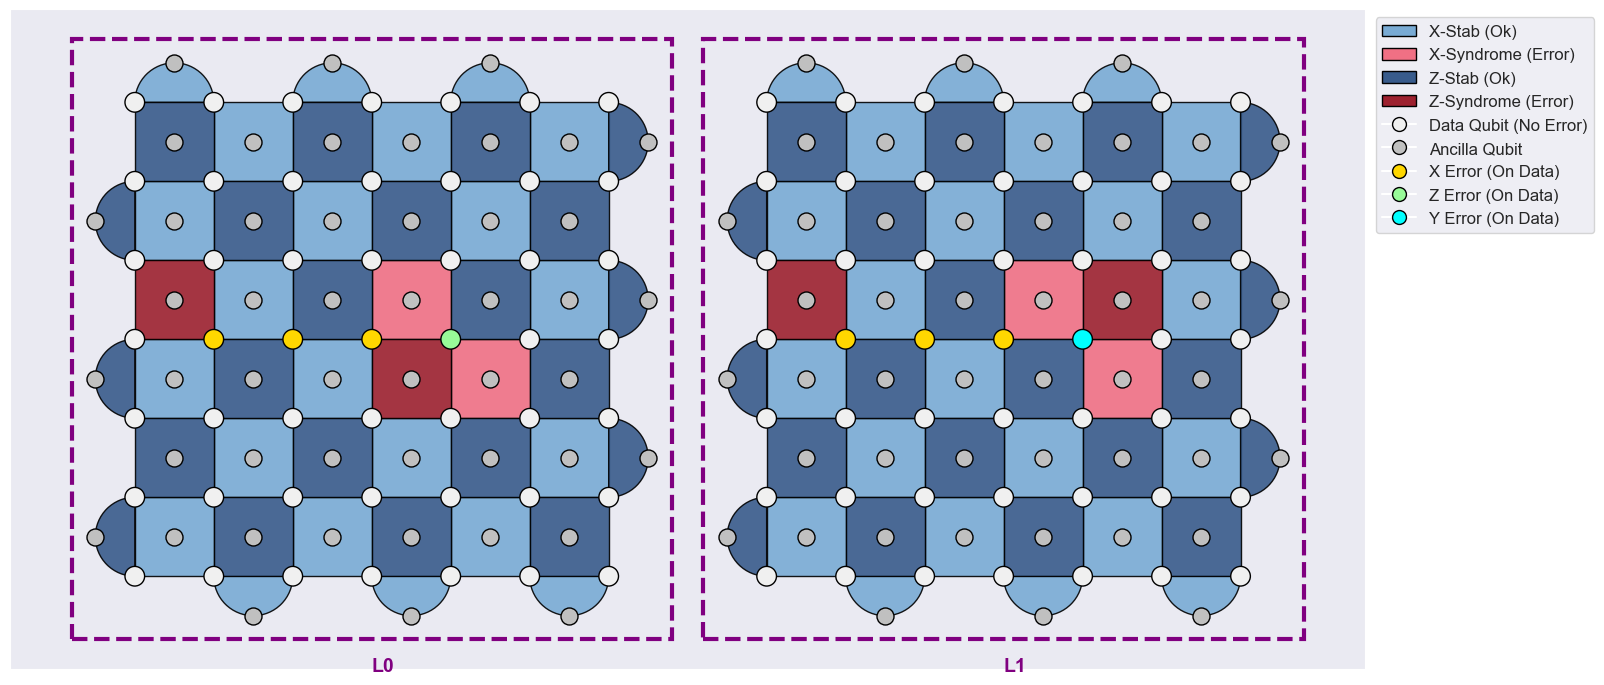

In [9]:
x_errs = {"0": [46, 47, 48], "1": [143,144, 145, 146] }
z_errs = {"0": [38, 49], "1": [146]}

mlsc.visualize(show_ancillas=True, show_indices=False, X_errors=x_errs, Z_errors=z_errs)

Now onto the SurfaceCode class

In [2]:
from surface_code import SurfaceCode
from typing import List
import numpy as np

sc = SurfaceCode(distance=7)

x_indices = [anc for anc in sc.stab_indices if sc.index_mapping[anc][1] == 'X_stab']
x_coords = [sc.index_mapping[anc][0] for anc in x_indices]
z_indices = [anc for anc in sc.stab_indices if sc.index_mapping[anc][1] == 'Z_stab']
z_coords = [sc.index_mapping[anc][0] for anc in z_indices]

print("X Stabilizer Coordinates:", x_coords, end='\n')
print("X Stabilizer indices:", x_indices, end='\n')
print("Z Stabilizer Coordinates:", z_coords, end='\n')
print("Z Stabilizer indices:", z_indices, end='\n')

data_qubit_indices = [sc.inverse_mapping[q] for q in sc.qubit_coords if sc.index_mapping[sc.inverse_mapping[q]][1] == 'data']
print("Data Qubit Coordinates:", data_qubit_indices, end='\n')

x_err_at: List[int] = [46,47,48]
syndrome = sc.get_syndrome(x_errors=x_err_at, z_errors=x_err_at)
print("Syndrome:", syndrome, end='\n')

# sc.plot()

X Stabilizer Coordinates: [(0.5, 0.5), (0.5, 2.5), (0.5, 4.5), (0.5, 6.5), (1.5, -0.5), (1.5, 1.5), (1.5, 3.5), (1.5, 5.5), (2.5, 0.5), (2.5, 2.5), (2.5, 4.5), (2.5, 6.5), (3.5, -0.5), (3.5, 1.5), (3.5, 3.5), (3.5, 5.5), (4.5, 0.5), (4.5, 2.5), (4.5, 4.5), (4.5, 6.5), (5.5, -0.5), (5.5, 1.5), (5.5, 3.5), (5.5, 5.5)]
X Stabilizer indices: [11, 39, 67, 94, 0, 25, 53, 81, 13, 41, 69, 95, 1, 27, 55, 83, 15, 43, 71, 96, 2, 29, 57, 85]
Z Stabilizer Coordinates: [(-0.5, 0.5), (-0.5, 2.5), (-0.5, 4.5), (0.5, 1.5), (0.5, 3.5), (0.5, 5.5), (1.5, 0.5), (1.5, 2.5), (1.5, 4.5), (2.5, 1.5), (2.5, 3.5), (2.5, 5.5), (3.5, 0.5), (3.5, 2.5), (3.5, 4.5), (4.5, 1.5), (4.5, 3.5), (4.5, 5.5), (5.5, 0.5), (5.5, 2.5), (5.5, 4.5), (6.5, 1.5), (6.5, 3.5), (6.5, 5.5)]
Z Stabilizer indices: [10, 38, 66, 24, 52, 80, 12, 40, 68, 26, 54, 82, 14, 42, 70, 28, 56, 84, 16, 44, 72, 30, 58, 86]
Data Qubit Coordinates: [3, 4, 5, 6, 7, 8, 9, 17, 18, 19, 20, 21, 22, 23, 31, 32, 33, 34, 35, 36, 37, 45, 46, 47, 48, 49, 50, 51,

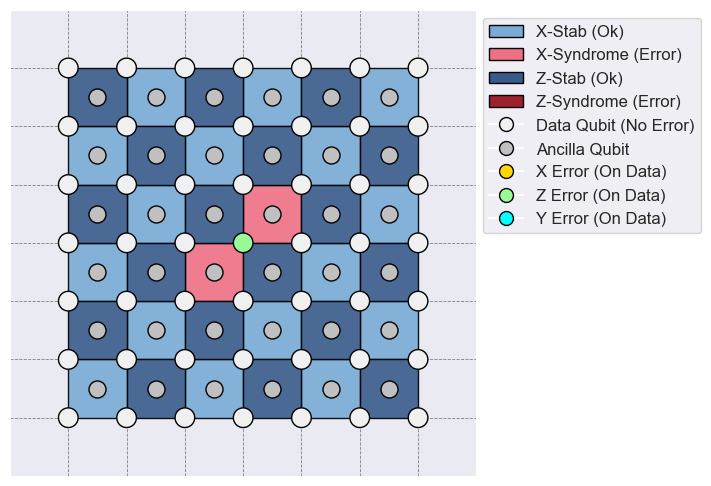

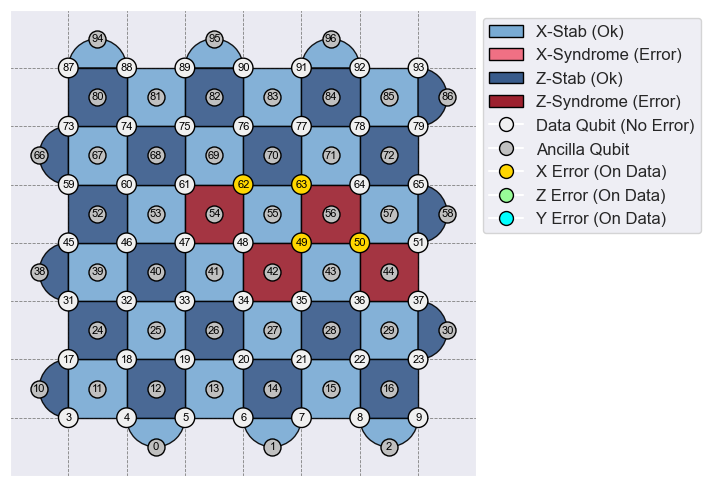

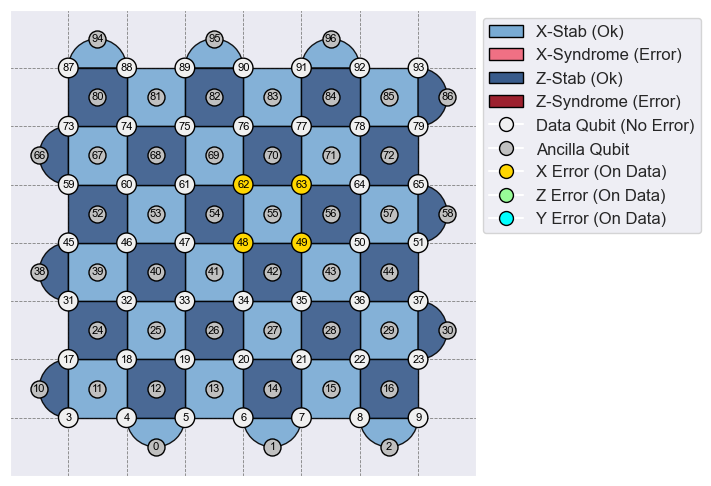

In [3]:
# sc.visualize_results(show_ancillas=True, show_index=True)
sc.visualize_results(z_err=[48], x_err=[], show_ancillas=True, show_index=False, show_edges=False)
sc.visualize_results(z_err=[], x_err=[62, 63, 49, 50], show_ancillas=True, show_index=True)
sc.visualize_results(z_err=[], x_err=[48, 49, 62, 63], show_ancillas=True, show_index=True)

# sc.visualize_results(z_err=[48], x_err=[], show_ancillas=True, show_index=True)

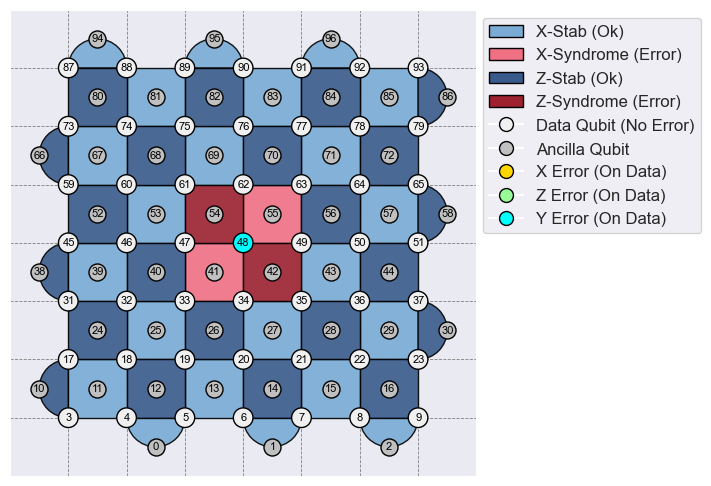

In [7]:
sc.visualize_results(z_err=[48], x_err=[48], show_ancillas=True, show_index=True)


I even wrote a short visualization for the unrotated surface code - this is mostly for creating an image for the report in the end, but feel free to play around with syndromes, logical errors, stabilizers and what comes to mind.

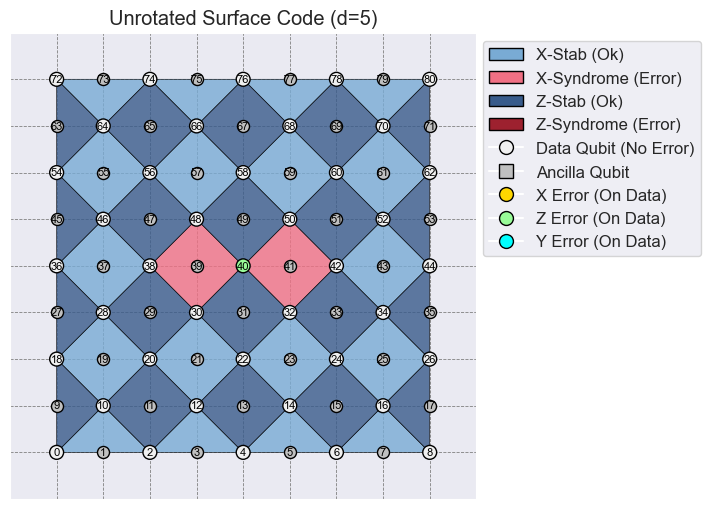

In [5]:
from unrotated_surface_code import UnrotatedSurfaceCode as USC

usc = USC(distance=5)
usc.visualize(show_ancillas=True, show_index=True, x_err=[], z_err=[40])

From here on out we perform simple performance tests for the SurfaceCode class. We can actually see that the logical error rates go down (lower than the physical error rates) as we increase the code distance, and lower the physical error rates.

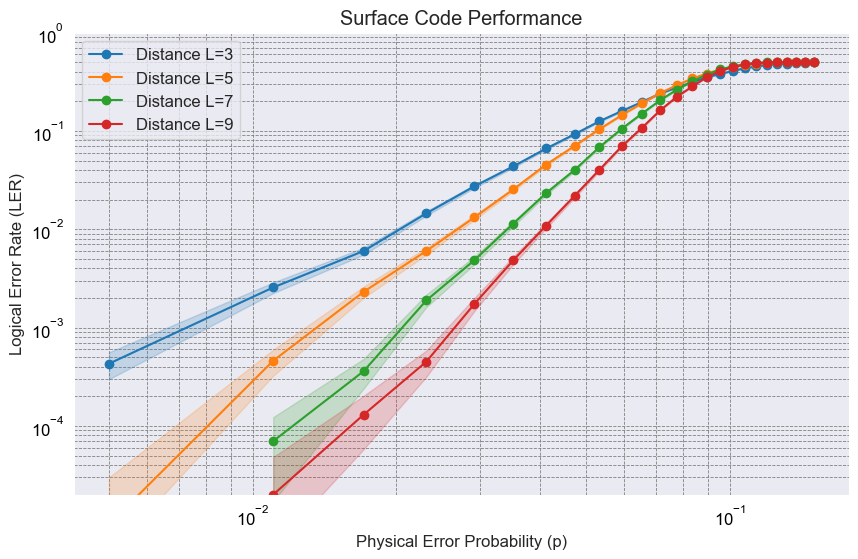

In [2]:
import numpy as np
import matplotlib as mpl
import seaborn as sns
from surface_code import SurfaceCode
import matplotlib.pyplot as plt
from tqdm import tqdm
Ls = [3,5,7,9]
ps = np.linspace(0.005, 0.15, 25)

# results = {}
shots=100_000
# stds = {}
# for L in tqdm(Ls, desc=f"Surface Code Distances", position=0, leave=True):
#     SC = SurfaceCode(distance=L)
#     res_L = []
#     res_Lstd = []
#     for p in tqdm(ps, desc=f"Physical Error Rates", position=1, leave=True):
#         SC.build_in_stim(rounds=L, depolarize_prob=p)
#         ler, syndrome, obs, preds = SC.run_with_pymatching(shots=shots)
#         res_L.append(ler)

#         ler_std = np.sqrt(ler * (1 - ler) / shots)
#         res_Lstd.append(ler_std)
        
#     results[L] = np.array(res_L)
#     stds[L] = np.array(res_Lstd)


sns.set_style("darkgrid")
mpl.rcParams.update(
    {
        "font.size": 12,
        "grid.color": "0.5",
        "grid.linestyle": "--",
        "grid.linewidth": 0.6,
        "xtick.color": "black",
        "ytick.color": "black",
    }
)

plt.figure(figsize=(10, 6))

for L, lers in results.items():
    non_zero_indices = np.where(lers > 0)
    
    ps_filtered = ps[non_zero_indices]
    lers_filtered = lers[non_zero_indices]
    stds_filtered = stds[L][non_zero_indices]
    lower_bound = []
    for index in range(len(lers_filtered)):
        lower_bound.append(lers_filtered[index] - 2*stds_filtered[index] if  lers_filtered[index] - 2*stds_filtered[index] > lers_filtered[index]/10 else  lers_filtered[index] - stds_filtered[index] if lers_filtered[index] - stds_filtered[index] > lers_filtered[index]/5 else  lers_filtered[index]/2)
    if len(ps_filtered) > 0:
        line, = plt.plot(ps_filtered, lers_filtered, marker='o', linestyle='-', label=f'Distance L={L}')
        plt.fill_between(ps_filtered, lower_bound, lers_filtered + 2*stds_filtered, alpha=0.2, color=line.get_color())

plt.ylim(2e-5, 1)
plt.xlabel("Physical Error Probability (p)")
plt.ylabel("Logical Error Rate (LER)")
plt.title("Surface Code Performance")
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")

    

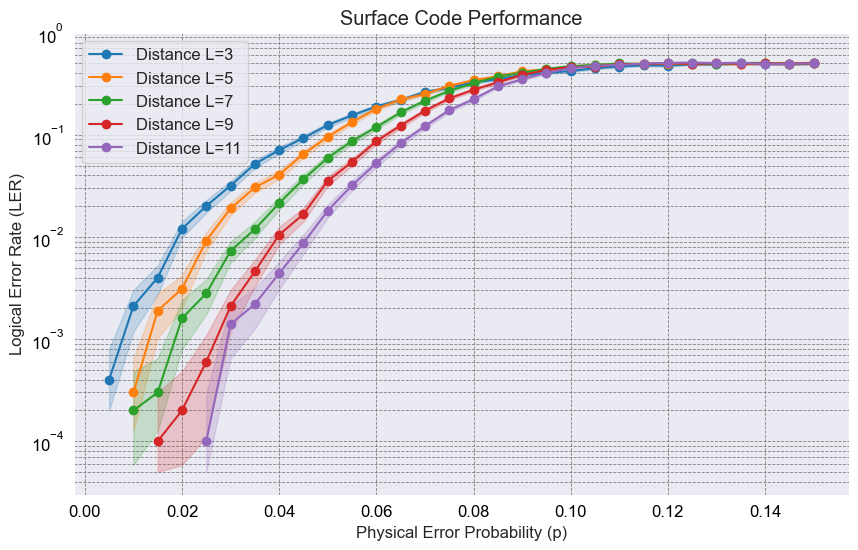

In [23]:
import numpy as np
import matplotlib as mpl
import seaborn as sns
from surface_code import SurfaceCode
import matplotlib.pyplot as plt

Ls = [3,5,7,9, 11]
ps = np.linspace(0.005, 0.15, 30)

# results = {}
shots=10_000
# stds = {}
# for L in Ls:
    # SC = SurfaceCode(distance=L)
    # res_L = []
    # res_Lstd = []
    # for p in ps:
    #     SC.build_in_stim(rounds=L, depolarize_prob=p)
    #     ler, syndrome, obs, preds = SC.run_with_pymatching(shots=shots)
    #     res_L.append(ler)

    #     ler_std = np.sqrt(ler * (1 - ler) / shots)
    #     res_Lstd.append(ler_std)
        
    # results[L] = np.array(res_L)
    # stds[L] = np.array(res_Lstd)


sns.set_style("darkgrid")
mpl.rcParams.update(
    {
        "font.size": 12,
        "grid.color": "0.5",
        "grid.linestyle": "--",
        "grid.linewidth": 0.6,
        "xtick.color": "black",
        "ytick.color": "black",
    }
)

plt.figure(figsize=(10, 6))

for L, lers in results.items():
    non_zero_indices = np.where(lers > 0)
    
    ps_filtered = ps[non_zero_indices]
    lers_filtered = lers[non_zero_indices]
    stds_filtered = stds[L][non_zero_indices]
    lower_bound = []
    for index in range(len(lers_filtered)):
        lower_bound.append(lers_filtered[index] - 2*stds_filtered[index] if  lers_filtered[index] - 2*stds_filtered[index] > lers_filtered[index]/10 else  lers_filtered[index] - stds_filtered[index] if lers_filtered[index] - stds_filtered[index] > lers_filtered[index]/5 else  lers_filtered[index]/2)
    if len(ps_filtered) > 0:
        line, = plt.plot(ps_filtered, lers_filtered, marker='o', linestyle='-', label=f'Distance L={L}')
        plt.fill_between(ps_filtered, lower_bound, lers_filtered + 2*stds_filtered, alpha=0.2, color=line.get_color())

plt.ylim(3e-5, 1)
plt.xlabel("Physical Error Probability (p)")
plt.ylabel("Logical Error Rate (LER)")
plt.title("Surface Code Performance")
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")

    

We can also take results by injecting a specific X error on a data qubit at a certain time step (after the first initialization, which is idealized). Please feel free to modify which qubit should be affected. Please also note that the qubit indices are shown when visualizing with show_index=True. You can of course also add more rounds and see that the outcomes stay the same. for this increase the rounds and uncomment the slicing, then you can see the syndrome changes over multiple rounds (which would correspond to the detection events in a real experiment).

Use the plot() and diagram() functions to get a better idea of the circuit structure.

Round 1 (Raw): [ True  True  True False False False False False]
Round 2 (Raw): [ True  True  True False False  True  True False]
Syndrome (1-2 Diff): [False False False False False  True  True False]


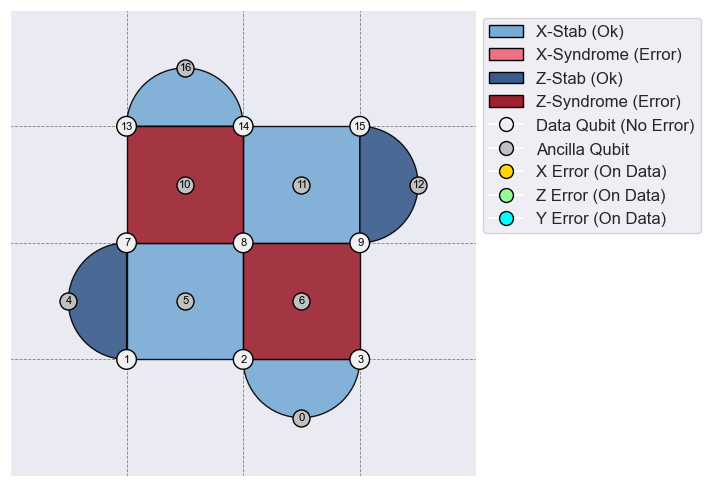

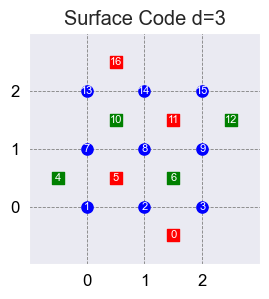

/----------------------\ /-----------------------------------------------------------------\ /-------------------------------------------------------------------\ /-----------------------------------------------------------------------------------------------------------------------------------\
 q0: -QUBIT_COORDS(1.5,-0.5)---R-----------------H-@-@-H-------------------------M:rec[2]----------R-----------------H-@-@-H-------------------------M:rec[10]-----------DETECTOR(1.5,-0.5,2):D2=rec[2]*rec[10]------------------------------------------------------------------------------------------------
                                                   | |                                                                 | |
 q1: -QUBIT_COORDS(0,0)------R-------X-------------|-|-----------@---------------------------------------X-------------|-|-----------@-----------------------------------M:rec[16]------------------------------OBSERVABLE_INCLUDE:L0*=rec[24]*rec[23]*rec[22]*rec[21]*rec[20]*rec[19]*rec[18]*rec[17]*rec[16]-
                                     |             | |           |                                       |             | |           |
 q2: -QUBIT_COORDS(1,0)------R-----X-|-------------|-X-----------|-----------@-------------------------X-|-------------|-X-----------|-----------@-----------------------M:rec[17]-----------------------------------------------------------------------------------------------------------------------------
                                   | |             |             |           |                         | |             |             |           |
 q3: -QUBIT_COORDS(2,0)------R-----|-|-------------X-------------|-------@---|-------------------------|-|-------------X-------------|-------@---|-----------------------M:rec[18]-----------------------------------------------------------------------------------------------------------------------------
                                   | |                           |       |   |                         | |                           |       |   |
 q4: -QUBIT_COORDS(-0.5,0.5)---R---|-|---------------------------X-X-----|---|---M:rec[4]----------R---|-|---------------------------X-X-----|---|---M:rec[12]-----------DETECTOR(-0.5,0.5,2):D4=rec[4]*rec[12]------------------------------------------------------------------------------------------------
                                   | |                             |     |   |                         | |                             |     |   |
 q5: -QUBIT_COORDS(0.5,0.5)----R-H-@-@-@-@-H-----------------------|-----|---|---M:rec[0]----------R-H-@-@-@-@-H-----------------------|-----|---|---M:rec[8]------------DETECTOR(0.5,0.5,2):D0=rec[0]*rec[8]--------------------------------------------------------------------------------------------------
                                       | |                         |     |   |                             | |                         |     |   |
 q6: -QUBIT_COORDS(1.5,0.5)----R-------|-|-------------------------|-----X-X-X-X-M:rec[6]----------R-------|-|-------------------------|-----X-X-X-X-M:rec[14]-----------DETECTOR(1.5,0.5,2):D6=rec[6]*rec[14]-------------------------------------------------------------------------------------------------
                                       | |                         |       |   |                           | |                         |       |   |
 q7: -QUBIT_COORDS(0,1)------R---------|-X-------------------------@---@---|---|---------------------------|-X-------------------------@---@---|---|---------------------M:rec[19]-----------------------------------------------------------------------------------------------------------------------------
                                       |                               |   |   |                           |                               |   |   |
 q8: -QUBIT_COORDS(1,1)------R---------X-------------------X-------@---|---|---@-------------------X-------X-------------------

In [ ]:
from surface_code import SurfaceCode
sc = SurfaceCode(distance=3)
sc.build_in_stim(rounds=2, injection=True, inject_X_pos=8, depolarize_prob=0.0) # inject a single X error on data qubit 8

results = sc.run_simulation(shots=1)
single_shot = results[0]

# Calculate number of ancillas
num_ancillas = len(sc.x_stabilisers_coords) + len(sc.z_stabilisers_coords)

# Split results into rounds
round_1 = single_shot[:num_ancillas]  # initial round -> track as Pauli frame / baseline
round_2 = single_shot[num_ancillas:2*num_ancillas] # second round - have error occurred? --> check by syndrome change
# round_3 = single_shot[2*num_ancillas:3*num_ancillas]
# round_4 = single_shot[3*num_ancillas:4*num_ancillas]

syndrome_change = round_1 ^ round_2

print("Round 1 (Raw):", round_1)
print("Round 2 (Raw):", round_2)
# print("Round 3 (Raw):", round_3)
# print("Round 4 (Raw):", round_4)
print("Syndrome (1-2 Diff):", syndrome_change)
# print("Syndrome (1-3 Diff):", round_1^round_3)
# print("Syndrome (1-4 Diff):", round_1^round_4)

# Visualize the CHANGE, not the RAW round
sc.visualize_results(round_1^round_2, show_ancillas=True, show_index=True) 
sc.plot()
sc.diagram()

Save the diagram as a .svg file for better quality and later use. 

In [10]:
diagram = sc.circuit.without_noise().diagram("timeline")
svg_str = diagram._repr_svg_()

with open("timeline.svg", "w", encoding="utf-8") as f:
    f.write(svg_str)

You can also verify the mapping, indices and the coordinates if you are curious:

0 (1.5, -0.5) X_stab -> [(2.0, 0.0), (1.0, 0.0)]
inverse mapping: [(2.0, 0.0), (1.0, 0.0)] -> [4, 3]

1 (3.5, -0.5) X_stab -> [(4.0, 0.0), (3.0, 0.0)]
inverse mapping: [(4.0, 0.0), (3.0, 0.0)] -> [6, 5]

7 (-0.5, 0.5) Z_stab -> [(0.0, 1.0), (0.0, 0.0)]
inverse mapping: [(0.0, 1.0), (0.0, 0.0)] -> [12, 2]

8 (0.5, 0.5) X_stab -> [(1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0)]
inverse mapping: [(1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0)] -> [13, 12, 3, 2]

9 (1.5, 0.5) Z_stab -> [(2.0, 1.0), (2.0, 0.0), (1.0, 1.0), (1.0, 0.0)]
inverse mapping: [(2.0, 1.0), (2.0, 0.0), (1.0, 1.0), (1.0, 0.0)] -> [14, 4, 13, 3]

10 (2.5, 0.5) X_stab -> [(3.0, 1.0), (2.0, 1.0), (3.0, 0.0), (2.0, 0.0)]
inverse mapping: [(3.0, 1.0), (2.0, 1.0), (3.0, 0.0), (2.0, 0.0)] -> [15, 14, 5, 4]

11 (3.5, 0.5) Z_stab -> [(4.0, 1.0), (4.0, 0.0), (3.0, 1.0), (3.0, 0.0)]
inverse mapping: [(4.0, 1.0), (4.0, 0.0), (3.0, 1.0), (3.0, 0.0)] -> [16, 6, 15, 5]

17 (0.5, 1.5) Z_stab -> [(1.0, 2.0), (1.0, 1.0), (0.0, 2.0), (0

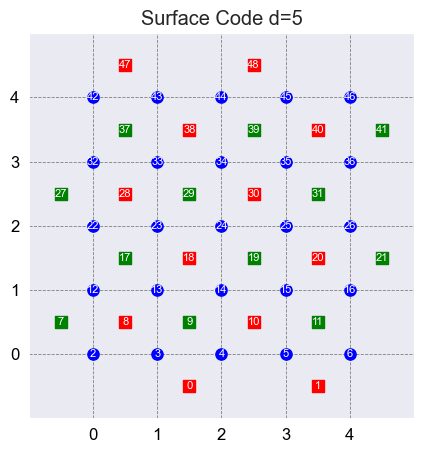

Sorted stabilizers:
8 ((0.5, 0.5), 'X_stab')
28 ((0.5, 2.5), 'X_stab')
47 ((0.5, 4.5), 'X_stab')
0 ((1.5, -0.5), 'X_stab')
18 ((1.5, 1.5), 'X_stab')
38 ((1.5, 3.5), 'X_stab')
10 ((2.5, 0.5), 'X_stab')
30 ((2.5, 2.5), 'X_stab')
48 ((2.5, 4.5), 'X_stab')
1 ((3.5, -0.5), 'X_stab')
20 ((3.5, 1.5), 'X_stab')
40 ((3.5, 3.5), 'X_stab')
7 ((-0.5, 0.5), 'Z_stab')
27 ((-0.5, 2.5), 'Z_stab')
17 ((0.5, 1.5), 'Z_stab')
37 ((0.5, 3.5), 'Z_stab')
9 ((1.5, 0.5), 'Z_stab')
29 ((1.5, 2.5), 'Z_stab')
19 ((2.5, 1.5), 'Z_stab')
39 ((2.5, 3.5), 'Z_stab')
11 ((3.5, 0.5), 'Z_stab')
31 ((3.5, 2.5), 'Z_stab')
21 ((4.5, 1.5), 'Z_stab')
41 ((4.5, 3.5), 'Z_stab')
Data qubits: [2, 3, 4, 5, 6, 12, 13, 14, 15, 16, 22, 23, 24, 25, 26, 32, 33, 34, 35, 36, 42, 43, 44, 45, 46]


In [ ]:
from surface_code import SurfaceCode
sc = SurfaceCode(distance=5)

# Build circuit for 2 rounds to allow comparison
sc.build_in_stim(rounds=4)
all_ids = list(sc.index_mapping.keys())

for anc in all_ids:
    coord, qtype = sc.index_mapping[anc]
    if qtype == 'data':
        continue
    neigh = sc.get_surrounding_data_qubits(coord)
    print(anc, coord, qtype, '->', neigh)
    sc.inverse_mapping
    print(f"inverse mapping: {neigh} -> {[sc.inverse_mapping[n] for n in neigh]}\n")

sc.plot()

print("Sorted stabilizers:")
stab_indices = sc.get_stabilisers(_as="idx") # type: ignore
        
stab_indices = sorted(  # otherwise Z and X stabilizers are measured in random order!
    stab_indices,
    key=lambda anc: (
        sc.index_mapping[anc][1],        # 'X_stab' or 'Z_stab'
        sc.index_mapping[anc][0][0],     # x-coordinate
        sc.index_mapping[anc][0][1],     # y-coordinate
    )
)
for anc in stab_indices:
    print(anc, sc.index_mapping[anc])

data_indices = [k for k, v in sc.index_mapping.items() if v[1] == 'data']
print("Data qubits:", data_indices)
